In [51]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Linear Reg:

basic:

In [52]:
def my_least_squares(B, y): #input B like [[1,2],[2,3],[3,4]], y like [[1],[2],[3]]
    start_time = time.time()
    B = np.asmatrix(B)
    A = np.insert(B, 0, 1, axis=1)
    y = np.asmatrix(y)
    #beta = np.dot(np.linalg.inv(np.dot(A.T, A)),A.T)
    beta = (((A.T * A).I) * A.T)*y
    #beta = np.dot(beta, y)
    #print(A.shape, y.shape)
    end_time = time.time()
    print("Time usage in Linear reg: ", end_time-start_time)
    return beta #beta will be like [[0.1],[0.4],[0.2]]

gradient_descent:

In [53]:
def my_gradient_descent(B, y): #input B like [[1,2],[2,3],[3,4]], y like [[1],[2],[3]]
    start_time = time.time()
    B = np.asmatrix(B)
    A = np.insert(B, 0, 1, axis=1)
    beta_size = A.shape[1]
    y = np.asmatrix(y)
    
    beta = np.asmatrix(np.random.rand(beta_size, 1))
    #print(beta)
    alpha = 0.0001
    K = 100000
    for i in range(K):
        beta = beta - alpha*((A.T * A)*beta - A.T*y)
    end_time = time.time()
    print("time usage in Gradient descent: ", end_time-start_time)
    return beta #beta will be like [[0.1],[0.4],[0.2]]

In [54]:
#B = np.array([[1,2,3],[2,2,4],[1,1,1],[3,2,2],[2,1,2]])
B = np.array([[3.75,110,2,3.75*110,3.75*2],[3.8,100,2,3.8*100,3.8*2],[4,115,2,4*115,4*2],[3.5,100,1,3.5*100,3.5*1],[3.6,105,1,3.6*105,3.6*1],[3.2,105,1,3.2*105,3.2*1],[3.4,105,1,3.4*105,3.4*1]])
print(B)

#y = np.array([[7],[8],[3],[9],[8]])
y = np.array([[80],[85],[92],[88],[92],[82],[87]])
print(y)
beta = my_least_squares(B,y)

print(my_least_squares(B,y))
#print(my_gradient_descent(B,y))

#test = np.matrix([1,4,110,1,4*110,4*1])
test_m = np.matrix([1,3.8,110,2,3.8*110,3.8*2])
print(test_m*beta)

[[  3.75 110.     2.   412.5    7.5 ]
 [  3.8  100.     2.   380.     7.6 ]
 [  4.   115.     2.   460.     8.  ]
 [  3.5  100.     1.   350.     3.5 ]
 [  3.6  105.     1.   378.     3.6 ]
 [  3.2  105.     1.   336.     3.2 ]
 [  3.4  105.     1.   357.     3.4 ]]
[[80]
 [85]
 [92]
 [88]
 [92]
 [82]
 [87]]
Time usage in Linear reg:  0.0011250972747802734
Time usage in Linear reg:  0.0006666183471679688
[[-475.28571434]
 [ 159.71428573]
 [   6.2       ]
 [-173.71428572]
 [  -1.68571429]
 [  42.28571429]]
[[82.94285717]]


# SVM

[1 1 1 0 0 0 0]


SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

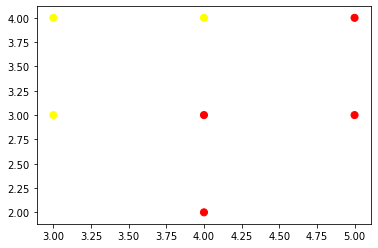

In [64]:
#X = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4,3],[4,1]])
#y = np.array([1,1,1,1,0,0,0])

X = np.array([[3,4],[3,3],[4,4],[5,3],[4,2],[4,3],[5,4]])
y = np.array([1,1,1,0,0,0,0])

print(y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

In [65]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[4. 3.]
 [5. 4.]
 [4. 4.]]


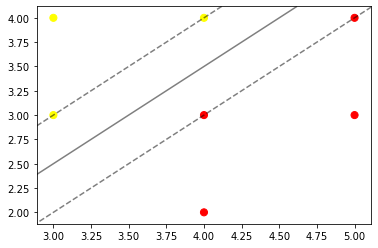

In [66]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);
print(model.support_vectors_)

# PCA

[[ 1  2  3  6  7]
 [ 1  2 -1  7 -5]
 [ 2  2  1  4  3]
 [ 1  1  4 -9 -3]
 [-2 -6 -2 -2 -3]
 [-3 -1 -5 -6  1]]


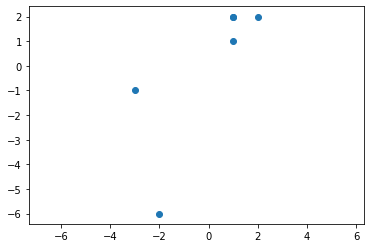

In [70]:
#X = np.array([[1,2,3],[1,2,-1],[-1,-3,-2],[-1,-1,0]])
X = np.array([[1,2,3,6,7],[1,2,-1,7,-5],[2,2,1,4,3],[1,1,4,-9,-3],[-2,-6,-2,-2,-3],[-3,-1,-5,-6,1]])
print(X)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [71]:
pca = PCA(n_components=3)
pca.fit(X)

compt = (pca.components_).T
print(compt)

[[ 0.17729431 -0.13042211  0.36237558]
 [ 0.25590594 -0.29037605  0.37275963]
 [ 0.14186973 -0.45527609  0.58090182]
 [ 0.88314562  0.43988866 -0.04710815]
 [ 0.32094496 -0.70561567 -0.62455431]]


In [72]:
ans = np.dot(X,compt)
print(ans)

[[ 8.66020385 -4.3769802  -1.80392879]
 [ 5.12453099  6.35140085  3.32000753]
 [ 5.5036876  -1.65416477 -0.0109233 ]
 [-7.9104663  -4.08405346  5.3563788 ]
 [-4.90288984  4.15072237 -2.15523334]
 [-6.4750663  -0.38692479 -4.7063009 ]]
